# Handwritten Hindi varnamala(Characters) Recognition Using Random Kitchen sink Algorithm 

# NIshit Prajapati CB.EN.P2DSC21018

In [74]:
# importing neccessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# importing the hindi varnamala(characters) csv format dataset

data = pd.read_csv("hindi_varnamala.csv")

In [3]:
# peeking at data
data

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_9
91996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_9
91997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_9
91998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_9


In [81]:
x = data.drop("character", axis = 1)
y = data["character"]

digit_6


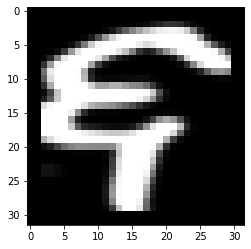

In [82]:
# here is a 2D plot of 1024 pixel as a gray scale image of ith row's data 
plt.figure(figsize = (4,4))
index = 84000 # by changing index, we can see index associated row's label as well as image associated with it
grid = x.iloc[index].to_numpy().reshape(32,32) # 32*32 = 1024 pixels
plt.imshow(grid, cmap = 'gray') # it is showing gray intensity graph, gray image
print(y[index])

In [4]:
data2 = data.loc[(data['character'] == 'character_25_ma')|(data['character'] == 'digit_7')]
data2 = data2.reset_index(drop = True)
data2

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_25_ma
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_25_ma
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_25_ma
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_25_ma
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_25_ma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_7
3996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_7
3997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_7
3998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_7


In [5]:
# shift column 'character' to first position
first_column = data2.pop('character')
  
# insert column using insert(position,column_name,first_column) function

data2.insert(0, 'character', first_column)
data2

,character,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,...,pixel_1014,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023
0,character_25_ma,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,character_25_ma,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,character_25_ma,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,character_25_ma,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,character_25_ma,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,digit_7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3996,digit_7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3997,digit_7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3998,digit_7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train, test = train_test_split(data2, test_size = 0.2, random_state=3, stratify = data2["character"])

In [8]:
train0 = train.reset_index(drop=True)
train0

,character,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,...,pixel_1014,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023
0,character_25_ma,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,digit_7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,digit_7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,character_25_ma,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,character_25_ma,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,character_25_ma,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3196,character_25_ma,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3197,digit_7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3198,digit_7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
test0 = test.reset_index(drop=True)
test0

,character,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,...,pixel_1014,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023
0,character_25_ma,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,digit_7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,digit_7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,character_25_ma,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,character_25_ma,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,character_25_ma,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
796,character_25_ma,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
797,character_25_ma,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
798,character_25_ma,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
x_train = train0.drop("character", axis =1)
x_train

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1014,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
y_train = train0["character"]
y_train

0       character_25_ma
1               digit_7
2               digit_7
3       character_25_ma
4       character_25_ma
             ...       
3195    character_25_ma
3196    character_25_ma
3197            digit_7
3198            digit_7
3199            digit_7
Name: character, Length: 3200, dtype: object

In [13]:
x_test = test0.drop("character", axis = 1)
x_test

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1014,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
797,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
798,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
y_test = test0["character"]
y_test

0      character_25_ma
1              digit_7
2              digit_7
3      character_25_ma
4      character_25_ma
            ...       
795    character_25_ma
796    character_25_ma
797    character_25_ma
798    character_25_ma
799    character_25_ma
Name: character, Length: 800, dtype: object

In [15]:
# satndard scaler tries to makes mean 0 and standard devation 1

scaler = StandardScaler()
scaler.fit(x_train)
train_pixels = scaler.transform(x_train)
test_pixels = scaler.transform(x_test)

In [16]:
#MinMax scaler makes data values between 0 and 1

scaler2 = MinMaxScaler()
scaler2.fit(x_train) # transform data
train_pixels = scaler2.transform(x_train)
test_pixels = scaler2.transform(x_test)

In [17]:
# Making an instance of the Model

pca = PCA(.99)

In [18]:
# fitting pca to train features

pca.fit(x_train)

PCA(n_components=0.99)

In [19]:
# pca transformed train features data

x0_train = pca.transform(x_train)

In [27]:
k = {"character_25_ma" : 1, "digit_7" : -1}

In [21]:
train1 = pd.DataFrame(x0_train)
train1.insert(0,"labels", y_train)
train1

,labels,0,1,2,3,4,5,6,7,8,...,325,326,327,328,329,330,331,332,333,334
0,character_25_ma,-384.941699,-706.678419,-141.291581,-1264.735294,292.100495,309.013106,63.144945,512.867530,154.184849,...,-32.435163,-0.689382,-81.470305,-16.461233,-7.183515,-33.881114,-0.084355,-10.187997,23.523519,72.771931
1,digit_7,1185.717800,-1022.551356,70.785321,1198.443181,599.772208,-572.850880,273.733197,61.530559,109.959779,...,-8.958283,-1.136637,29.332697,-0.167875,-6.211638,-23.974432,-53.688849,-34.579716,-10.038827,-66.968922
2,digit_7,323.160716,-599.025092,-850.946606,-450.621690,-269.663722,629.945410,-337.267097,415.819872,86.727179,...,-15.196428,9.333072,40.698357,62.886790,3.041894,-24.553591,54.880226,-18.452016,-1.157234,9.439516
3,character_25_ma,-1303.449589,1.158678,-807.946819,-63.119873,-121.345586,-239.344693,-246.669032,-320.584840,-526.732776,...,14.309683,32.901890,-28.347123,-15.490507,12.133544,-38.206343,-48.373976,19.195442,-12.778759,-5.827325
4,character_25_ma,-944.029169,511.611625,66.522501,303.901411,316.268502,0.838122,-655.642587,788.219295,241.319747,...,-2.694701,25.455018,23.011453,-59.494641,-58.404856,21.149117,-37.654933,7.059779,-3.231412,55.400621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,character_25_ma,-1010.017407,933.121066,279.253435,1200.290980,-274.204149,1151.045812,115.163594,583.610256,-128.374201,...,10.364033,-19.792512,-2.004042,-16.982596,3.487893,9.104733,-16.463616,41.371011,4.543208,-4.959418
3196,character_25_ma,-846.416105,156.731867,-385.380951,-548.453309,762.120992,-371.453519,-24.178967,1110.979893,-544.413641,...,50.949909,-8.624870,-39.043910,7.468014,-4.452852,-39.485212,5.186328,5.237735,4.562744,-21.209606
3197,digit_7,160.214390,507.964826,333.766232,-481.277550,1197.666730,255.837903,55.175008,-490.063776,-5.155680,...,4.044258,17.121748,-14.196772,13.930034,51.383522,-45.343262,-11.890545,21.500690,-23.848289,3.888472
3198,digit_7,1526.698890,-611.188415,353.838251,-394.396499,-168.650524,-99.287471,-408.386884,-468.483090,-371.530617,...,-7.082526,52.565889,-40.173483,2.628890,-44.633208,-13.881976,42.410345,25.963795,21.858247,-33.008754


In [28]:
k3 = []
for i in range(len(train1)):
    k3.append(k[train1["labels"][i]])
k3

[1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,


In [36]:
train1.insert(1,"label", k3)

ValueError: cannot insert label, already exists

In [31]:
train1 = train1.drop("labels", axis = 1)
train1

,label,0,1,2,3,4,5,6,7,8,...,325,326,327,328,329,330,331,332,333,334
0,1,-384.941699,-706.678419,-141.291581,-1264.735294,292.100495,309.013106,63.144945,512.867530,154.184849,...,-32.435163,-0.689382,-81.470305,-16.461233,-7.183515,-33.881114,-0.084355,-10.187997,23.523519,72.771931
1,-1,1185.717800,-1022.551356,70.785321,1198.443181,599.772208,-572.850880,273.733197,61.530559,109.959779,...,-8.958283,-1.136637,29.332697,-0.167875,-6.211638,-23.974432,-53.688849,-34.579716,-10.038827,-66.968922
2,-1,323.160716,-599.025092,-850.946606,-450.621690,-269.663722,629.945410,-337.267097,415.819872,86.727179,...,-15.196428,9.333072,40.698357,62.886790,3.041894,-24.553591,54.880226,-18.452016,-1.157234,9.439516
3,1,-1303.449589,1.158678,-807.946819,-63.119873,-121.345586,-239.344693,-246.669032,-320.584840,-526.732776,...,14.309683,32.901890,-28.347123,-15.490507,12.133544,-38.206343,-48.373976,19.195442,-12.778759,-5.827325
4,1,-944.029169,511.611625,66.522501,303.901411,316.268502,0.838122,-655.642587,788.219295,241.319747,...,-2.694701,25.455018,23.011453,-59.494641,-58.404856,21.149117,-37.654933,7.059779,-3.231412,55.400621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,1,-1010.017407,933.121066,279.253435,1200.290980,-274.204149,1151.045812,115.163594,583.610256,-128.374201,...,10.364033,-19.792512,-2.004042,-16.982596,3.487893,9.104733,-16.463616,41.371011,4.543208,-4.959418
3196,1,-846.416105,156.731867,-385.380951,-548.453309,762.120992,-371.453519,-24.178967,1110.979893,-544.413641,...,50.949909,-8.624870,-39.043910,7.468014,-4.452852,-39.485212,5.186328,5.237735,4.562744,-21.209606
3197,-1,160.214390,507.964826,333.766232,-481.277550,1197.666730,255.837903,55.175008,-490.063776,-5.155680,...,4.044258,17.121748,-14.196772,13.930034,51.383522,-45.343262,-11.890545,21.500690,-23.848289,3.888472
3198,-1,1526.698890,-611.188415,353.838251,-394.396499,-168.650524,-99.287471,-408.386884,-468.483090,-371.530617,...,-7.082526,52.565889,-40.173483,2.628890,-44.633208,-13.881976,42.410345,25.963795,21.858247,-33.008754


In [23]:
# pca transformed test features data

x0_test = pca.transform(x_test)

In [24]:
test1 = pd.DataFrame(x0_test)
test1.insert(0,"labels", y_test)
test1

,labels,0,1,2,3,4,5,6,7,8,...,325,326,327,328,329,330,331,332,333,334
0,character_25_ma,-934.633013,-270.054214,-226.653941,257.768167,-306.933468,1142.215886,546.047084,-149.906173,0.888740,...,38.668756,11.369675,-17.962626,-31.121628,-9.764896,-22.339662,-8.886399,27.651349,-11.352852,-48.671212
1,digit_7,824.566739,-1244.102312,-518.419004,1515.289599,1017.517486,403.520192,335.517505,-20.655679,-67.678650,...,9.640895,-2.168621,30.407150,12.478997,-19.740181,-48.447583,-1.175611,-2.630079,9.900540,20.888806
2,digit_7,1348.297056,-1102.910167,269.364109,1200.498265,-162.010291,-690.524503,53.266126,-153.602655,585.282992,...,11.342750,49.526733,-59.691917,-17.593785,-41.954639,5.084201,-70.970989,-11.611621,39.610173,15.392613
3,character_25_ma,-1426.701548,-146.067410,243.052437,-321.600593,-309.007964,258.774257,-334.073968,-662.887473,853.615082,...,-17.202543,15.987835,35.056997,4.600192,-28.375643,7.551858,-37.956913,-30.386671,18.992419,-55.163696
4,character_25_ma,-1328.420659,1476.799979,-54.147925,1092.236271,-70.756353,539.625194,-81.190249,453.168361,-842.894539,...,-21.026537,0.171066,-84.214339,-1.644759,21.868656,0.958848,-40.411638,9.910145,62.232888,-18.235475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,character_25_ma,-462.905522,-226.826954,-22.603528,-690.686422,863.431671,-895.528514,-168.637981,1030.182617,28.909818,...,-43.426664,-14.200851,-25.216852,10.581311,6.100041,-21.419908,-44.916079,-32.664599,51.492840,23.799866
796,character_25_ma,-303.061784,-330.208472,937.159532,39.322144,-51.574063,580.999596,465.374785,682.103031,-71.613453,...,-61.406132,-19.273210,-115.071816,20.911334,15.134588,-23.548220,-41.522230,16.373909,57.404091,-28.239279
797,character_25_ma,-1136.794112,-192.360851,-508.005427,-126.290255,-667.118097,-974.500979,459.461032,3.851496,86.079953,...,-13.866908,-14.953558,63.582875,33.901281,-22.010335,-16.230937,13.411556,22.830342,-9.875643,31.647786
798,character_25_ma,-1270.897797,607.378326,134.263419,874.083006,-768.847159,-441.681361,-647.189428,403.071357,-126.488716,...,-37.661708,-19.509745,-22.729880,-55.999260,-10.716502,-1.220761,7.128529,7.276658,21.143115,-19.134813


In [32]:
k4 = []
for i in range(len(test1)):
    k4.append(k[test1["labels"][i]])
k4

[1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,


In [33]:
test1.insert(1,"label", k4)
test1 = test1.drop("labels", axis =1)
test1

,label,0,1,2,3,4,5,6,7,8,...,325,326,327,328,329,330,331,332,333,334
0,1,-934.633013,-270.054214,-226.653941,257.768167,-306.933468,1142.215886,546.047084,-149.906173,0.888740,...,38.668756,11.369675,-17.962626,-31.121628,-9.764896,-22.339662,-8.886399,27.651349,-11.352852,-48.671212
1,-1,824.566739,-1244.102312,-518.419004,1515.289599,1017.517486,403.520192,335.517505,-20.655679,-67.678650,...,9.640895,-2.168621,30.407150,12.478997,-19.740181,-48.447583,-1.175611,-2.630079,9.900540,20.888806
2,-1,1348.297056,-1102.910167,269.364109,1200.498265,-162.010291,-690.524503,53.266126,-153.602655,585.282992,...,11.342750,49.526733,-59.691917,-17.593785,-41.954639,5.084201,-70.970989,-11.611621,39.610173,15.392613
3,1,-1426.701548,-146.067410,243.052437,-321.600593,-309.007964,258.774257,-334.073968,-662.887473,853.615082,...,-17.202543,15.987835,35.056997,4.600192,-28.375643,7.551858,-37.956913,-30.386671,18.992419,-55.163696
4,1,-1328.420659,1476.799979,-54.147925,1092.236271,-70.756353,539.625194,-81.190249,453.168361,-842.894539,...,-21.026537,0.171066,-84.214339,-1.644759,21.868656,0.958848,-40.411638,9.910145,62.232888,-18.235475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1,-462.905522,-226.826954,-22.603528,-690.686422,863.431671,-895.528514,-168.637981,1030.182617,28.909818,...,-43.426664,-14.200851,-25.216852,10.581311,6.100041,-21.419908,-44.916079,-32.664599,51.492840,23.799866
796,1,-303.061784,-330.208472,937.159532,39.322144,-51.574063,580.999596,465.374785,682.103031,-71.613453,...,-61.406132,-19.273210,-115.071816,20.911334,15.134588,-23.548220,-41.522230,16.373909,57.404091,-28.239279
797,1,-1136.794112,-192.360851,-508.005427,-126.290255,-667.118097,-974.500979,459.461032,3.851496,86.079953,...,-13.866908,-14.953558,63.582875,33.901281,-22.010335,-16.230937,13.411556,22.830342,-9.875643,31.647786
798,1,-1270.897797,607.378326,134.263419,874.083006,-768.847159,-441.681361,-647.189428,403.071357,-126.488716,...,-37.661708,-19.509745,-22.729880,-55.999260,-10.716502,-1.220761,7.128529,7.276658,21.143115,-19.134813


In [48]:
train1 = pd.DataFrame(train1)
train1

,label,0,1,2,3,4,5,6,7,8,...,325,326,327,328,329,330,331,332,333,334
0,1,-384.941699,-706.678419,-141.291581,-1264.735294,292.100495,309.013106,63.144945,512.867530,154.184849,...,-32.435163,-0.689382,-81.470305,-16.461233,-7.183515,-33.881114,-0.084355,-10.187997,23.523519,72.771931
1,-1,1185.717800,-1022.551356,70.785321,1198.443181,599.772208,-572.850880,273.733197,61.530559,109.959779,...,-8.958283,-1.136637,29.332697,-0.167875,-6.211638,-23.974432,-53.688849,-34.579716,-10.038827,-66.968922
2,-1,323.160716,-599.025092,-850.946606,-450.621690,-269.663722,629.945410,-337.267097,415.819872,86.727179,...,-15.196428,9.333072,40.698357,62.886790,3.041894,-24.553591,54.880226,-18.452016,-1.157234,9.439516
3,1,-1303.449589,1.158678,-807.946819,-63.119873,-121.345586,-239.344693,-246.669032,-320.584840,-526.732776,...,14.309683,32.901890,-28.347123,-15.490507,12.133544,-38.206343,-48.373976,19.195442,-12.778759,-5.827325
4,1,-944.029169,511.611625,66.522501,303.901411,316.268502,0.838122,-655.642587,788.219295,241.319747,...,-2.694701,25.455018,23.011453,-59.494641,-58.404856,21.149117,-37.654933,7.059779,-3.231412,55.400621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,1,-1010.017407,933.121066,279.253435,1200.290980,-274.204149,1151.045812,115.163594,583.610256,-128.374201,...,10.364033,-19.792512,-2.004042,-16.982596,3.487893,9.104733,-16.463616,41.371011,4.543208,-4.959418
3196,1,-846.416105,156.731867,-385.380951,-548.453309,762.120992,-371.453519,-24.178967,1110.979893,-544.413641,...,50.949909,-8.624870,-39.043910,7.468014,-4.452852,-39.485212,5.186328,5.237735,4.562744,-21.209606
3197,-1,160.214390,507.964826,333.766232,-481.277550,1197.666730,255.837903,55.175008,-490.063776,-5.155680,...,4.044258,17.121748,-14.196772,13.930034,51.383522,-45.343262,-11.890545,21.500690,-23.848289,3.888472
3198,-1,1526.698890,-611.188415,353.838251,-394.396499,-168.650524,-99.287471,-408.386884,-468.483090,-371.530617,...,-7.082526,52.565889,-40.173483,2.628890,-44.633208,-13.881976,42.410345,25.963795,21.858247,-33.008754


In [49]:
test1 = pd.DataFrame(test1)
test1

,label,0,1,2,3,4,5,6,7,8,...,325,326,327,328,329,330,331,332,333,334
0,1,-934.633013,-270.054214,-226.653941,257.768167,-306.933468,1142.215886,546.047084,-149.906173,0.888740,...,38.668756,11.369675,-17.962626,-31.121628,-9.764896,-22.339662,-8.886399,27.651349,-11.352852,-48.671212
1,-1,824.566739,-1244.102312,-518.419004,1515.289599,1017.517486,403.520192,335.517505,-20.655679,-67.678650,...,9.640895,-2.168621,30.407150,12.478997,-19.740181,-48.447583,-1.175611,-2.630079,9.900540,20.888806
2,-1,1348.297056,-1102.910167,269.364109,1200.498265,-162.010291,-690.524503,53.266126,-153.602655,585.282992,...,11.342750,49.526733,-59.691917,-17.593785,-41.954639,5.084201,-70.970989,-11.611621,39.610173,15.392613
3,1,-1426.701548,-146.067410,243.052437,-321.600593,-309.007964,258.774257,-334.073968,-662.887473,853.615082,...,-17.202543,15.987835,35.056997,4.600192,-28.375643,7.551858,-37.956913,-30.386671,18.992419,-55.163696
4,1,-1328.420659,1476.799979,-54.147925,1092.236271,-70.756353,539.625194,-81.190249,453.168361,-842.894539,...,-21.026537,0.171066,-84.214339,-1.644759,21.868656,0.958848,-40.411638,9.910145,62.232888,-18.235475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1,-462.905522,-226.826954,-22.603528,-690.686422,863.431671,-895.528514,-168.637981,1030.182617,28.909818,...,-43.426664,-14.200851,-25.216852,10.581311,6.100041,-21.419908,-44.916079,-32.664599,51.492840,23.799866
796,1,-303.061784,-330.208472,937.159532,39.322144,-51.574063,580.999596,465.374785,682.103031,-71.613453,...,-61.406132,-19.273210,-115.071816,20.911334,15.134588,-23.548220,-41.522230,16.373909,57.404091,-28.239279
797,1,-1136.794112,-192.360851,-508.005427,-126.290255,-667.118097,-974.500979,459.461032,3.851496,86.079953,...,-13.866908,-14.953558,63.582875,33.901281,-22.010335,-16.230937,13.411556,22.830342,-9.875643,31.647786
798,1,-1270.897797,607.378326,134.263419,874.083006,-768.847159,-441.681361,-647.189428,403.071357,-126.488716,...,-37.661708,-19.509745,-22.729880,-55.999260,-10.716502,-1.220761,7.128529,7.276658,21.143115,-19.134813


In [52]:
# concatenating to perform RKS

frames = [train1, test1]
data3 = pd.concat(frames)
data3 = data3.reset_index(drop=True)
data3

,label,0,1,2,3,4,5,6,7,8,...,325,326,327,328,329,330,331,332,333,334
0,1,-384.941699,-706.678419,-141.291581,-1264.735294,292.100495,309.013106,63.144945,512.867530,154.184849,...,-32.435163,-0.689382,-81.470305,-16.461233,-7.183515,-33.881114,-0.084355,-10.187997,23.523519,72.771931
1,-1,1185.717800,-1022.551356,70.785321,1198.443181,599.772208,-572.850880,273.733197,61.530559,109.959779,...,-8.958283,-1.136637,29.332697,-0.167875,-6.211638,-23.974432,-53.688849,-34.579716,-10.038827,-66.968922
2,-1,323.160716,-599.025092,-850.946606,-450.621690,-269.663722,629.945410,-337.267097,415.819872,86.727179,...,-15.196428,9.333072,40.698357,62.886790,3.041894,-24.553591,54.880226,-18.452016,-1.157234,9.439516
3,1,-1303.449589,1.158678,-807.946819,-63.119873,-121.345586,-239.344693,-246.669032,-320.584840,-526.732776,...,14.309683,32.901890,-28.347123,-15.490507,12.133544,-38.206343,-48.373976,19.195442,-12.778759,-5.827325
4,1,-944.029169,511.611625,66.522501,303.901411,316.268502,0.838122,-655.642587,788.219295,241.319747,...,-2.694701,25.455018,23.011453,-59.494641,-58.404856,21.149117,-37.654933,7.059779,-3.231412,55.400621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,-462.905522,-226.826954,-22.603528,-690.686422,863.431671,-895.528514,-168.637981,1030.182617,28.909818,...,-43.426664,-14.200851,-25.216852,10.581311,6.100041,-21.419908,-44.916079,-32.664599,51.492840,23.799866
3996,1,-303.061784,-330.208472,937.159532,39.322144,-51.574063,580.999596,465.374785,682.103031,-71.613453,...,-61.406132,-19.273210,-115.071816,20.911334,15.134588,-23.548220,-41.522230,16.373909,57.404091,-28.239279
3997,1,-1136.794112,-192.360851,-508.005427,-126.290255,-667.118097,-974.500979,459.461032,3.851496,86.079953,...,-13.866908,-14.953558,63.582875,33.901281,-22.010335,-16.230937,13.411556,22.830342,-9.875643,31.647786
3998,1,-1270.897797,607.378326,134.263419,874.083006,-768.847159,-441.681361,-647.189428,403.071357,-126.488716,...,-37.661708,-19.509745,-22.729880,-55.999260,-10.716502,-1.220761,7.128529,7.276658,21.143115,-19.134813


In [53]:
features = data3.drop("label", axis =1)
features

,0,1,2,3,4,5,6,7,8,9,...,325,326,327,328,329,330,331,332,333,334
0,-384.941699,-706.678419,-141.291581,-1264.735294,292.100495,309.013106,63.144945,512.867530,154.184849,166.410316,...,-32.435163,-0.689382,-81.470305,-16.461233,-7.183515,-33.881114,-0.084355,-10.187997,23.523519,72.771931
1,1185.717800,-1022.551356,70.785321,1198.443181,599.772208,-572.850880,273.733197,61.530559,109.959779,62.598172,...,-8.958283,-1.136637,29.332697,-0.167875,-6.211638,-23.974432,-53.688849,-34.579716,-10.038827,-66.968922
2,323.160716,-599.025092,-850.946606,-450.621690,-269.663722,629.945410,-337.267097,415.819872,86.727179,250.754840,...,-15.196428,9.333072,40.698357,62.886790,3.041894,-24.553591,54.880226,-18.452016,-1.157234,9.439516
3,-1303.449589,1.158678,-807.946819,-63.119873,-121.345586,-239.344693,-246.669032,-320.584840,-526.732776,-593.359024,...,14.309683,32.901890,-28.347123,-15.490507,12.133544,-38.206343,-48.373976,19.195442,-12.778759,-5.827325
4,-944.029169,511.611625,66.522501,303.901411,316.268502,0.838122,-655.642587,788.219295,241.319747,188.039334,...,-2.694701,25.455018,23.011453,-59.494641,-58.404856,21.149117,-37.654933,7.059779,-3.231412,55.400621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-462.905522,-226.826954,-22.603528,-690.686422,863.431671,-895.528514,-168.637981,1030.182617,28.909818,97.650924,...,-43.426664,-14.200851,-25.216852,10.581311,6.100041,-21.419908,-44.916079,-32.664599,51.492840,23.799866
3996,-303.061784,-330.208472,937.159532,39.322144,-51.574063,580.999596,465.374785,682.103031,-71.613453,-552.583453,...,-61.406132,-19.273210,-115.071816,20.911334,15.134588,-23.548220,-41.522230,16.373909,57.404091,-28.239279
3997,-1136.794112,-192.360851,-508.005427,-126.290255,-667.118097,-974.500979,459.461032,3.851496,86.079953,-108.786517,...,-13.866908,-14.953558,63.582875,33.901281,-22.010335,-16.230937,13.411556,22.830342,-9.875643,31.647786
3998,-1270.897797,607.378326,134.263419,874.083006,-768.847159,-441.681361,-647.189428,403.071357,-126.488716,199.944827,...,-37.661708,-19.509745,-22.729880,-55.999260,-10.716502,-1.220761,7.128529,7.276658,21.143115,-19.134813


In [54]:
labels = data3["label"]
labels

0       1
1      -1
2      -1
3       1
4       1
       ..
3995    1
3996    1
3997    1
3998    1
3999    1
Name: label, Length: 4000, dtype: int64

In [58]:
scaler1 = StandardScaler()
scaler1.fit(features)
features = scaler1.transform(features)
features.shape

(4000, 335)

In [59]:
# creating random numbers matrix from normal distribution
rand_num = np.random.normal(0,1,[335,400])
print(rand_num.shape)

(335, 400)


In [62]:
# multiplying the data features with random matrix

rk_data = np.matmul(features, rand_num)

In [63]:
# creating cosine and sine values of RKS data

rks_data = np.hstack((np.cos(rk_data),np.sin(rk_data)))
rks_data.shape

(4000, 800)

In [76]:
x_trn, x_tst, y_trn, y_tst = train_test_split(rks_data, labels, test_size= 0.2, random_state = 0)

# Prediction using Regularised least squares

In [79]:

def model(X_train, X_test, y_train, y_test, n): # n = no of features, which are 800 
    I = np.identity(n)
    weight = []

    for i in range(1,10):  
        w=np.matmul(np.matmul(np.linalg.inv(np.matmul(X_train.T, X_train) + i * I), X_train.T), y_train)
        weight.append(w)

    trainaccuracy = []
    testaccuracy = []

    for i in range(len(weight)):
        y_pred=(np.matmul(X_train, weight[i]))

        y_predd = (pd.DataFrame(y_pred)).apply(lambda x: x.argmax(), axis=1)
        y_trainn = (pd.DataFrame(y_train)).apply(lambda x: x.argmax(), axis=1)
        ytest_pred = np.matmul(X_test,weight[i])
        y_testpred = (pd.DataFrame(ytest_pred)).apply(lambda x: x.argmax(), axis=1)
        y_test_ = (pd.DataFrame(y_test)).apply(lambda x: x.argmax(), axis=1)

        acc = accuracy_score(y_predd, y_trainn)  
        trainaccuracy.append(acc)

        acctest = accuracy_score(y_testpred, y_test_)
        testaccuracy.append(acctest)

    return weight,trainaccuracy,testaccuracy

In [80]:
weights,trainaccuracy,testaccuracy = model(x_trn, x_tst, y_trn, y_tst, 800)  
print('Train Accuracy',trainaccuracy)
print('Test Accuracy',testaccuracy)

Train Accuracy [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Test Accuracy [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
